<a href="https://colab.research.google.com/github/Cazzarooo/Global-Solution-FloodWatch/blob/main/Global_Solution_FloodWatch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
# Carregar o dataset
file_path = '/content/flood.csv'
data = pd.read_csv(file_path)

In [3]:
# Estatísticas descritivas
print(data.describe())

       MonsoonIntensity  TopographyDrainage  RiverManagement  Deforestation  \
count      50000.000000        50000.000000      50000.00000   50000.000000   
mean           4.991480            4.984100          5.01594       5.008480   
std            2.236834            2.246488          2.23131       2.222743   
min            0.000000            0.000000          0.00000       0.000000   
25%            3.000000            3.000000          3.00000       3.000000   
50%            5.000000            5.000000          5.00000       5.000000   
75%            6.000000            6.000000          6.00000       6.000000   
max           16.000000           18.000000         16.00000      17.000000   

       Urbanization  ClimateChange  DamsQuality     Siltation  \
count  50000.000000   50000.000000  50000.00000  50000.000000   
mean       4.989060       4.988340      5.01536      4.988600   
std        2.243159       2.226761      2.24500      2.232642   
min        0.000000       0.

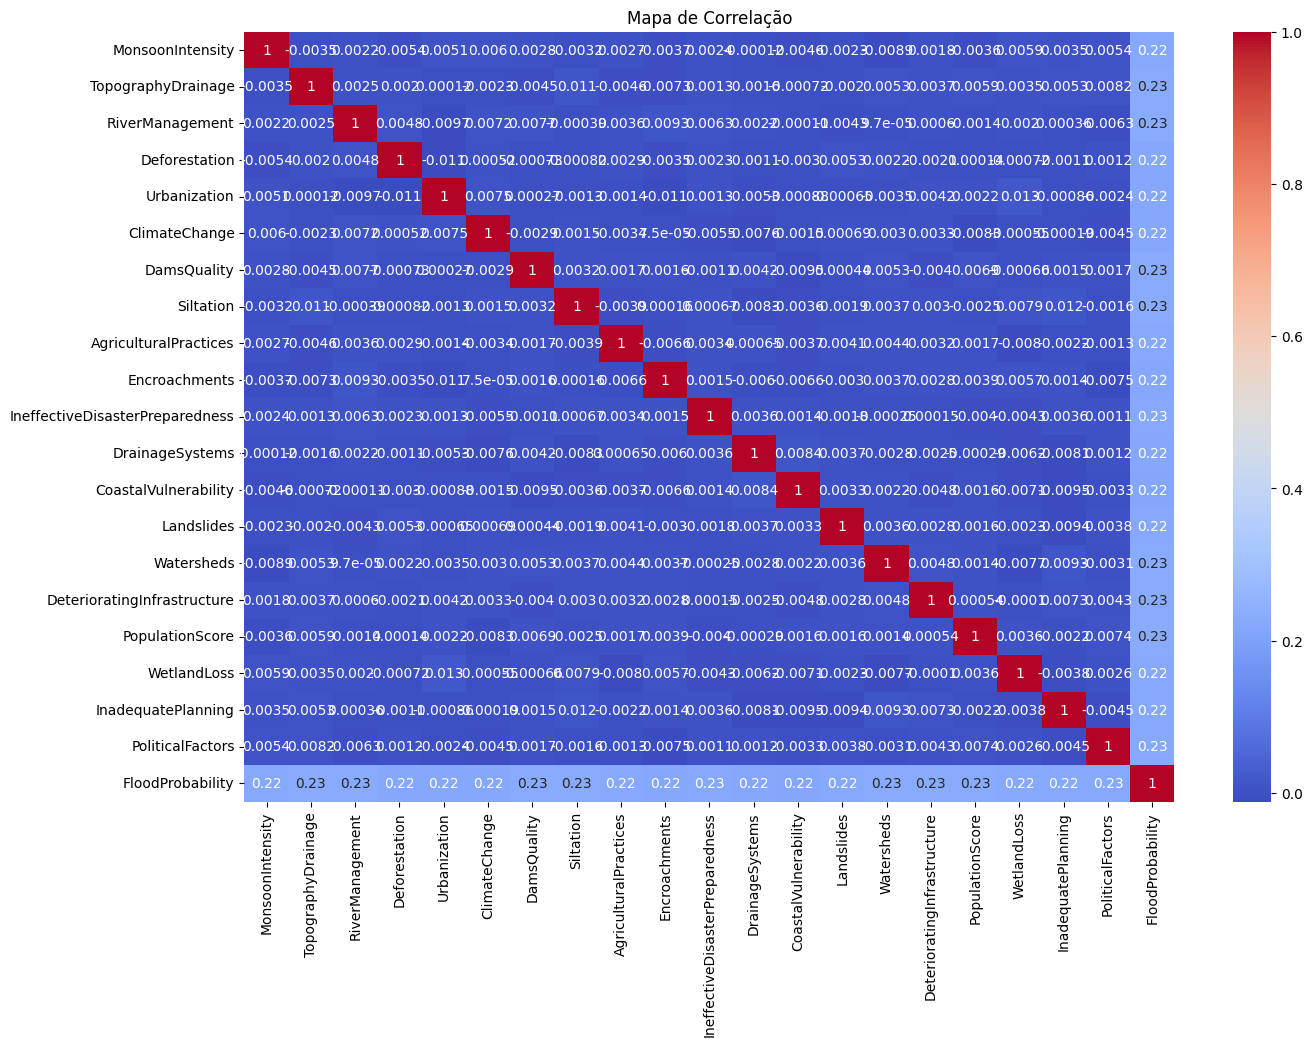

In [4]:
# Correlação entre variáveis
plt.figure(figsize=(15, 10))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm')
plt.title('Mapa de Correlação')
plt.show()

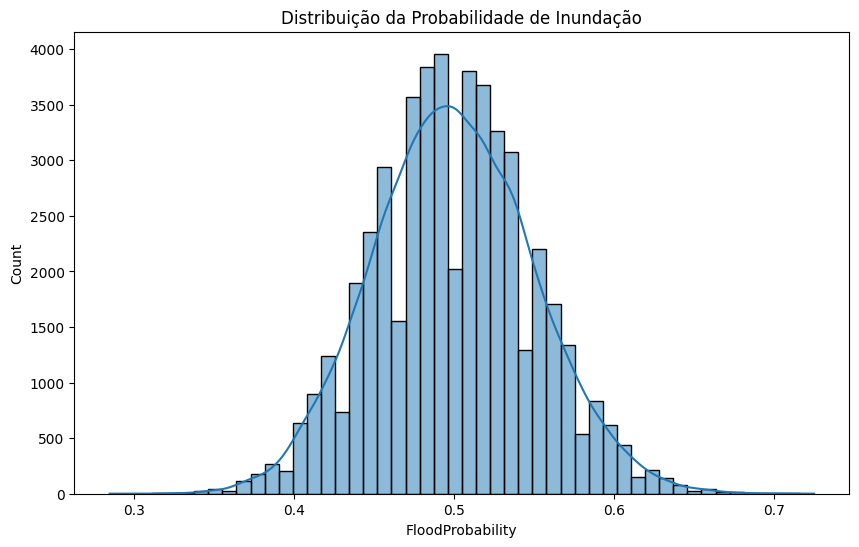

In [5]:
# Distribuição da variável alvo
plt.figure(figsize=(10, 6))
sns.histplot(data['FloodProbability'], bins=50, kde=True)
plt.title('Distribuição da Probabilidade de Inundação')
plt.show()

In [6]:
# Levantamento de hipóteses
correlation_with_target = data.corr()['FloodProbability'].sort_values(ascending=False)
print(correlation_with_target)

FloodProbability                   1.000000
DeterioratingInfrastructure        0.229444
TopographyDrainage                 0.229414
RiverManagement                    0.228917
Watersheds                         0.228152
DamsQuality                        0.227467
PopulationScore                    0.226928
Siltation                          0.226544
IneffectiveDisasterPreparedness    0.225126
PoliticalFactors                   0.225009
MonsoonIntensity                   0.224081
WetlandLoss                        0.223732
InadequatePlanning                 0.223329
Landslides                         0.222991
AgriculturalPractices              0.221846
ClimateChange                      0.220986
Urbanization                       0.220867
Deforestation                      0.220237
Encroachments                      0.218259
DrainageSystems                    0.217895
CoastalVulnerability               0.215187
Name: FloodProbability, dtype: float64


In [7]:
# Divisão dos dados
X = data.drop('FloodProbability', axis=1)
y = data['FloodProbability']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [8]:
# Inicialização dos modelos
models = {
    'Linear Regression': LinearRegression(),
    'Random Forest': RandomForestRegressor(n_estimators=100, random_state=42),
    'Gradient Boosting': GradientBoostingRegressor(n_estimators=100, random_state=42)
}

In [9]:
# Treinamento e avaliação
results = {}
y_preds = {}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    results[name] = {'MSE': mse, 'R2': r2}
    y_preds[name] = y_pred

results_df = pd.DataFrame(results).T
print(results_df)

                            MSE        R2
Linear Regression  1.591681e-32  1.000000
Random Forest      6.737141e-04  0.729496
Gradient Boosting  5.505254e-04  0.778957


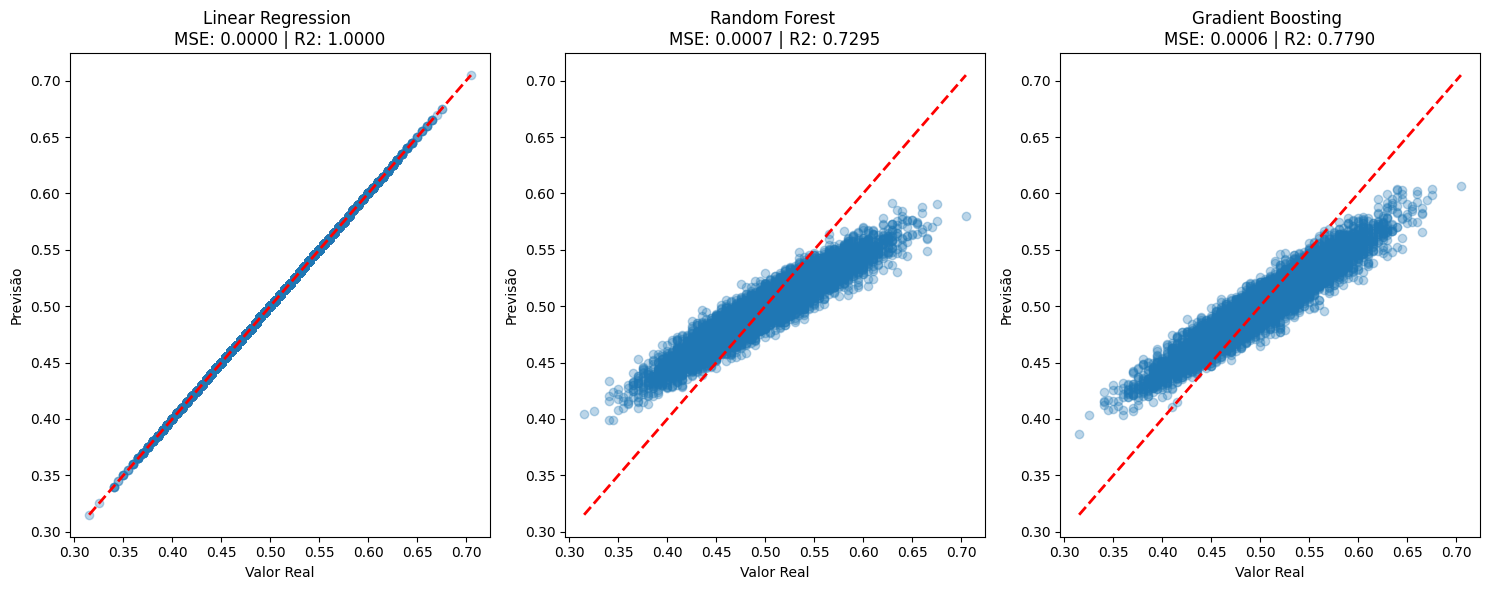

In [10]:
# Comparação das previsões com os valores reais
plt.figure(figsize=(15, 6))

for i, (name, y_pred) in enumerate(y_preds.items(), 1):
    plt.subplot(1, 3, i)
    plt.scatter(y_test, y_pred, alpha=0.3)
    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--r', linewidth=2)
    plt.xlabel('Valor Real')
    plt.ylabel('Previsão')
    plt.title(f'{name} \nMSE: {results[name]["MSE"]:.4f} | R2: {results[name]["R2"]:.4f}')

plt.tight_layout()
plt.show()

In [11]:
def prever_enchente(novos_dados):
    """
    Função para prever a probabilidade de enchente com novos dados de entrada.

    :param novos_dados: DataFrame contendo os novos dados de entrada
    :return: Probabilidade de enchente
    """
    # Certifique-se de que os novos dados tenham as mesmas colunas que os dados de treinamento
    if set(novos_dados.columns) != set(X.columns):
        raise ValueError("Os dados de entrada devem ter as mesmas colunas que os dados de treinamento")

    # Previsão com o modelo treinado
    probabilidade_de_enchente = model.predict(novos_dados)
    return probabilidade_de_enchente

In [12]:
# Exemplo de uso da função de previsão
novos_dados = pd.DataFrame({
    'MonsoonIntensity': [5],
    'TopographyDrainage': [7],
    'RiverManagement': [4],
    'Deforestation': [6],
    'Urbanization': [8],
    'ClimateChange': [9],
    'DamsQuality': [5],
    'Siltation': [4],
    'AgriculturalPractices': [3],
    'Encroachments': [2],
    'IneffectiveDisasterPreparedness': [6],
    'DrainageSystems': [7],
    'CoastalVulnerability': [8],
    'Landslides': [3],
    'Watersheds': [4],
    'DeterioratingInfrastructure': [7],
    'PopulationScore': [6],
    'WetlandLoss': [5],
    'InadequatePlanning': [4],
    'PoliticalFactors': [3]
})

# Previsão da probabilidade de enchente
probabilidade = prever_enchente(novos_dados)
print(f'Probabilidade de enchente: {probabilidade[0]:.4f}')

Probabilidade de enchente: 0.5242
